# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import pandas as pd

## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

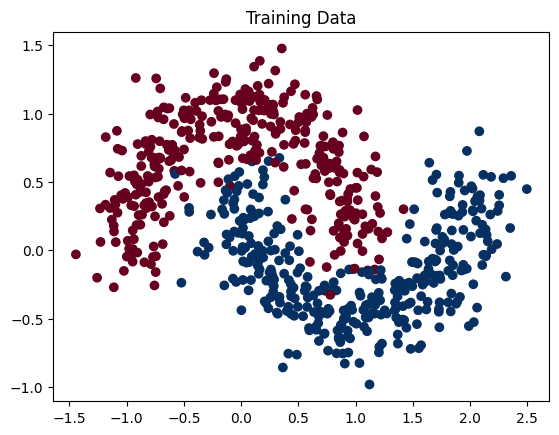

In [32]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [33]:
def build_model(activation_function='relu', loss_function='binary_crossentropy'):
    model = tf.keras.models.Sequential([

        tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')

    ])

    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    
    return model

# Training and evaluating the model
Let's train the model and see how well it solves the problem.

In [34]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100, plot=True):
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2)
    
    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    if plot:
        # Plotting training history
        plt.figure(figsize=(18, 5))

        plt.subplot(1, 3, 1)
        plt.plot(history.history['accuracy'], label='Accuracy (training data)')
        plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
        plt.title('Training and Validation Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()

        # Predicting on test data
        predictions = model.predict(X_test) > 0.5

        # Plotting model predictions
        plt.subplot(1, 3, 2)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
        plt.title('Model Predictions on Test Data')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # Plotting ground truth
        plt.subplot(1, 3, 3)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
        plt.title('Ground Truth for Test Data')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        plt.show()

        print(f"Test Loss: {test_loss:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f} \n")

    return test_loss, test_accuracy

# # Example of using the function with a specific activation and loss function
# model = build_model(activation_function='relu', loss_function='binary_crossentropy')
# train_and_evaluate_model(model, epochs=100)

# Experimentation
## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.
#

Activation function: Sigmoid
10/10 [==============================] - 0s 1ms/step


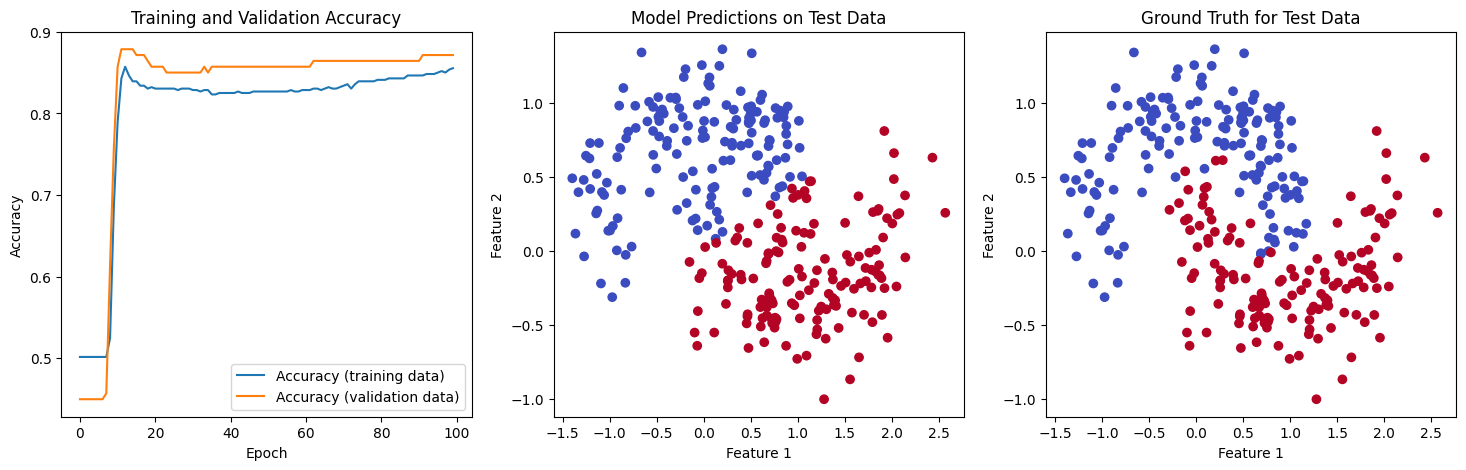

Test Loss: 0.3019
Test Accuracy: 0.8700 

Activation function: ReLU
10/10 [==============================] - 0s 1ms/step


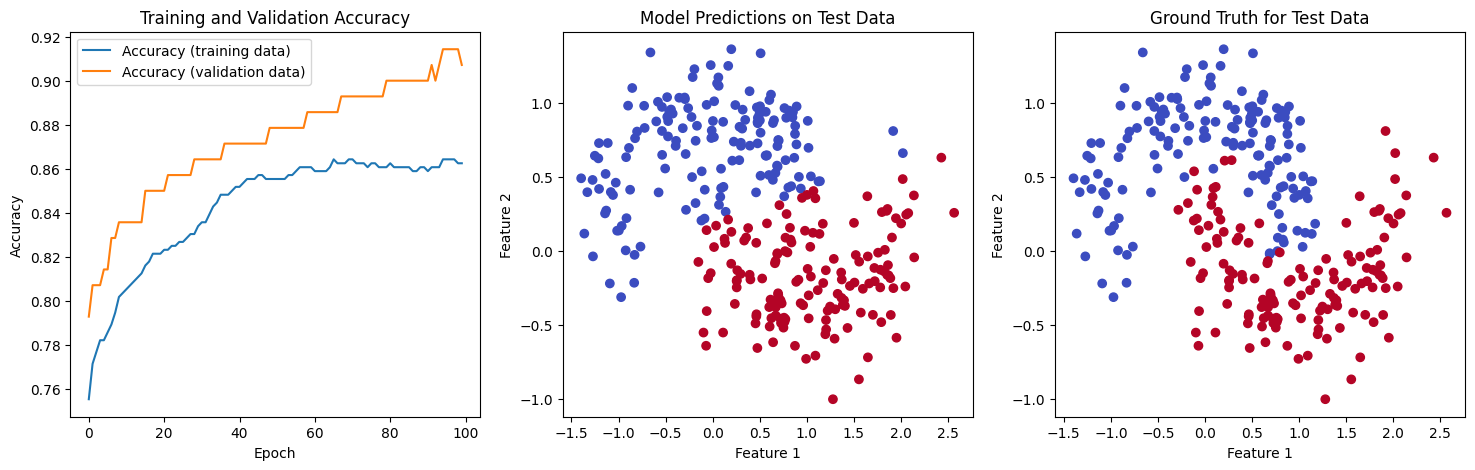

Test Loss: 0.2444
Test Accuracy: 0.8900 

Activation function: Tanh
10/10 [==============================] - 0s 1ms/step


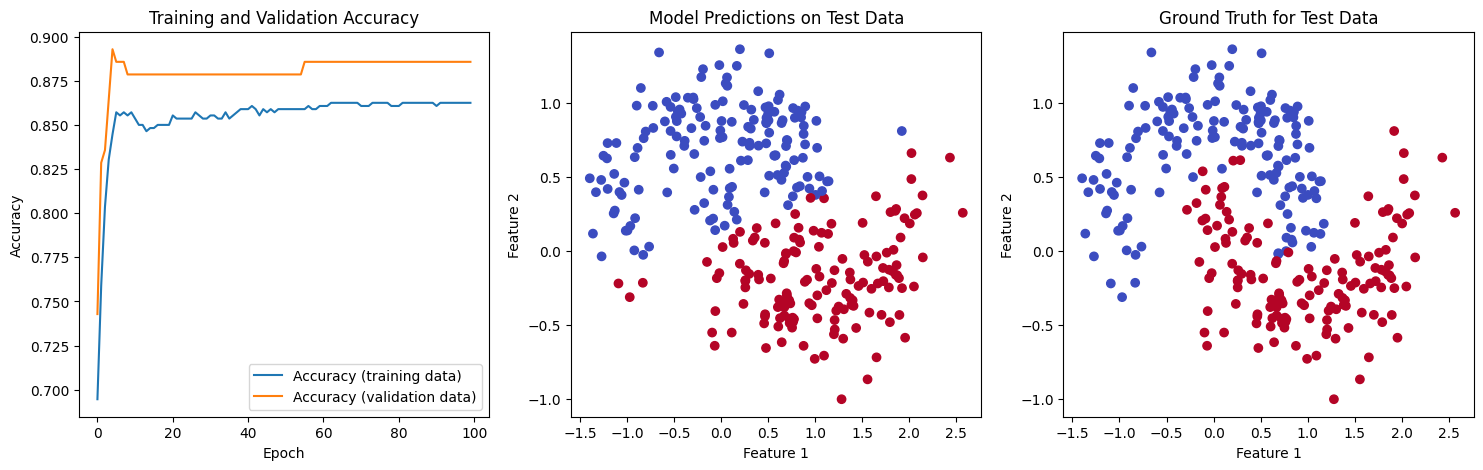

Test Loss: 0.2634
Test Accuracy: 0.8833 



In [35]:
activations = ['Sigmoid', 'ReLU', 'Tanh']
for a in activations:
    print(f"Activation function: {a}")
    loss, accuracy = train_and_evaluate_model(build_model(activation_function=a.lower()))

# Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.

Loss function: binary_crossentropy
10/10 [==============================] - 0s 1ms/step


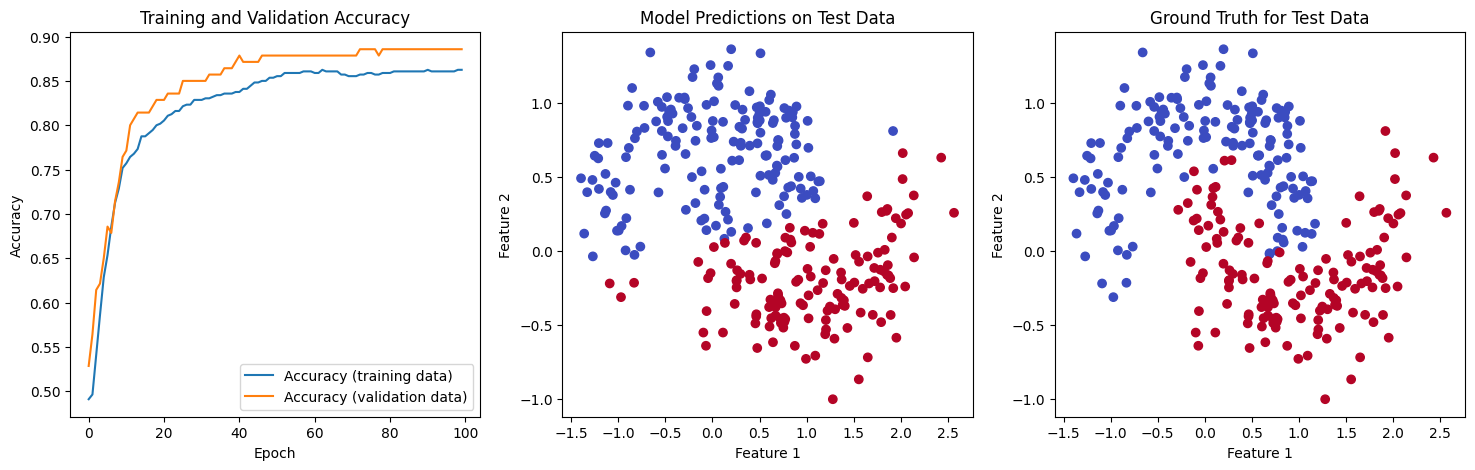

Test Loss: 0.2653
Test Accuracy: 0.8800 

Loss function: mean_squared_error
10/10 [==============================] - 0s 1ms/step


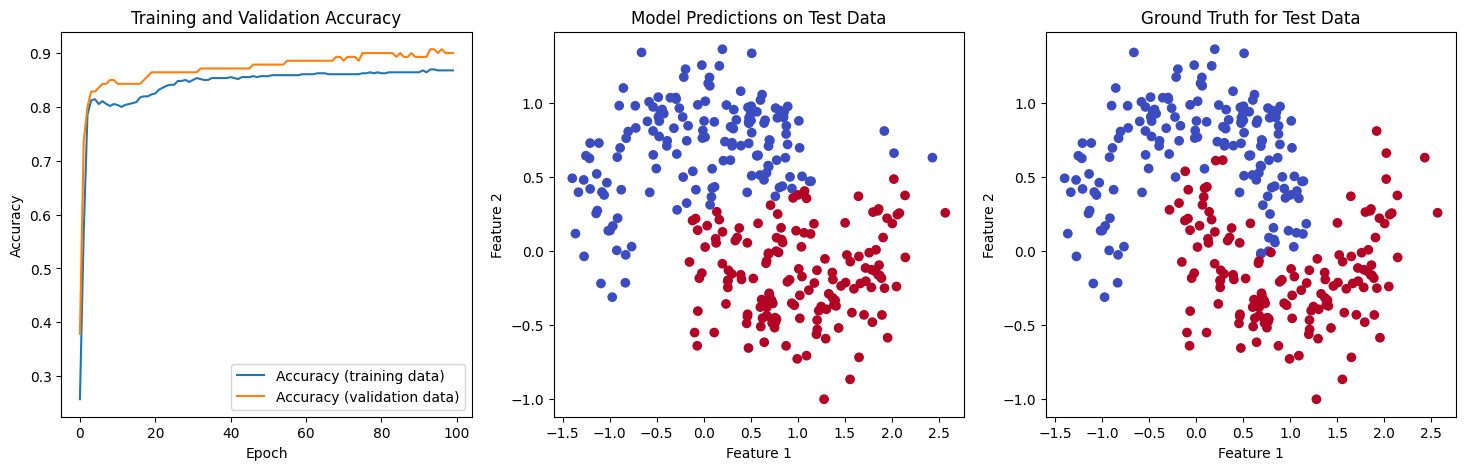

Test Loss: 0.0753
Test Accuracy: 0.8967 



In [36]:
loss_fn = ['binary_crossentropy', 'mean_squared_error']
for l in loss_fn:
    print(f"Loss function: {l}")
    train_and_evaluate_model(build_model(loss_function=l))

In [41]:
df = pd.DataFrame(columns=["Activation Function", "Loss Function", "Loss", "Accuracy"])

activations = ['Sigmoid', 'ReLU', 'Tanh']
loss_fn = ['binary_crossentropy', 'mean_squared_error']

dfs = []

for a in activations:
    for l in loss_fn:

        model = build_model(a.lower())
        loss, acc = train_and_evaluate_model(model, plot=False)

        df = pd.DataFrame({
            "Activation Function": [a],
            "Loss Function": [l],
            "Loss": [loss],
            "Accuracy": [acc],
        })

        dfs.append(df)

result = pd.concat(dfs, ignore_index=True)

In [55]:
result.sort_values(by=["Accuracy"], ascending=False)

,Activation Function,Loss Function,Loss,Accuracy
2,ReLU,binary_crossentropy,0.238639,0.893333
3,ReLU,mean_squared_error,0.297653,0.893333
4,Tanh,binary_crossentropy,0.263670,0.886667
0,Sigmoid,binary_crossentropy,0.291648,0.873333
1,Sigmoid,mean_squared_error,0.293463,0.873333
5,Tanh,mean_squared_error,0.272629,0.873333


In [50]:
result.sort_values(by=["Loss"])

,Activation Function,Loss Function,Loss,Accuracy
2,ReLU,binary_crossentropy,0.238639,0.893333
4,Tanh,binary_crossentropy,0.263670,0.886667
5,Tanh,mean_squared_error,0.272629,0.873333
0,Sigmoid,binary_crossentropy,0.291648,0.873333
1,Sigmoid,mean_squared_error,0.293463,0.873333
3,ReLU,mean_squared_error,0.297653,0.893333


*yeah idk why the default values for the model are the best, it discourages exploration*

# Analysis and Questions

After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?

2. How did different loss functions impact the learning process and accuracy?

3. Which combination of activation and loss function provided the best results for this task?

# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.

In [38]:
#TODO